In [1]:
import sys

sys.path.append("../")
from config.get_config import get_config

# Load Data

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.metrics import mean_squared_error

In [3]:
sys.path.append("../src")
from pipeline.factory import Factory
from preprocessing.process_raw_data import load_data

config = dict(get_config())
data_config = dict(config["data"])

2024-01-29 20:04:47.343057: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-29 20:04:47.384815: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-29 20:04:47.384838: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-29 20:04:47.384889: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-29 20:04:47.398616: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-29 20:04:47.399659: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [4]:
# fix paths
for k, v in data_config["paths"].items():
    for k2, v2 in v.items():
        data_config["paths"][k][k2] = "../" + v2

In [5]:
df = load_data(data_config["paths"])
f = Factory(data_config)
f.fit(df)

Fitting data ...


# EDA outliers PT1

In [6]:
train, val = f.get_df()
data = pd.concat([train, val])

data

,onpromotion,dcoilwtico,cluster,sales,typedays_Additional,typedays_Event,typedays_Holiday,typedays_Normal
2013-01-01,0.000000,0.792965,0.0,2511.618999,False,False,True,False
2013-01-02,0.000000,0.792965,0.0,496092.417944,False,False,False,True
2013-01-03,0.000000,0.790951,0.0,361461.231124,False,False,False,True
2013-01-04,0.000000,0.792728,0.0,354459.677093,False,False,False,True
2013-01-05,0.000000,0.793044,0.0,348347.385084,False,False,False,True
...,...,...,...,...,...,...,...,...
2017-08-11,0.448362,0.267914,0.0,826373.722022,False,False,True,False
2017-08-12,0.383685,0.263098,0.0,804556.616708,False,False,False,True
2017-08-13,0.319009,0.258281,0.0,782739.511395,False,False,False,True
2017-08-14,0.254332,0.253464,0.0,760922.406081,False,False,False,True


In [7]:
data["sales"].describe().apply(lambda x: format(x, "0.1f"))

count       1688.0
mean      590953.9
std       224878.1
min         2511.6
25%       397532.7
50%       602434.0
75%       728354.6
max      2283723.8
Name: sales, dtype: object

In [8]:
q_low = data["sales"].quantile(0.01)
q_hi = data["sales"].quantile(0.99)

data_outliers = data[(data["sales"] >= q_hi) | (data["sales"] <= q_low)]
data_outliers

,onpromotion,dcoilwtico,cluster,sales,typedays_Additional,typedays_Event,typedays_Holiday,typedays_Normal
2013-01-01,0.000000,0.792965,0.0,2.511619e+03,False,False,True,False
2013-01-10,0.000000,0.800900,0.0,2.589820e+05,False,False,False,True
2013-01-17,0.000000,0.820798,0.0,2.674985e+05,False,False,False,True
2013-01-24,0.000000,0.819140,0.0,2.472457e+05,False,False,False,True
2013-01-29,0.000000,0.846026,0.0,2.644888e+05,False,False,False,True
2013-01-31,0.000000,0.846382,0.0,2.712542e+05,False,False,False,True
2013-02-21,0.000000,0.788819,0.0,2.677111e+05,False,False,False,True
2013-02-26,0.000000,0.786924,0.0,2.704250e+05,False,False,False,True
2013-03-12,0.000000,0.784674,0.0,2.718234e+05,False,False,False,True
2013-03-14,0.000000,0.791662,0.0,2.475414e+05,False,False,False,True


Outliers sales in processed dataframe. Let's have a look at the original df at these dates.

# EDA Original DF

## Outliers from interpolation

First, check if outliers data are generated data (via interpolation)

In [9]:
df_date = pd.DataFrame(df["date"].unique(), index=df["date"].unique(), columns=["date"])
date_interpolated_outliers = data_outliers[
    np.logical_not(data_outliers.index.isin(df_date.index))
].index
date_interpolated_outliers

DatetimeIndex(['2014-12-21', '2014-12-25', '2014-12-27', '2017-01-01',
               '2017-07-02'],
              dtype='datetime64[ns]', freq=None)

In [10]:
def find_nearest_dates(x, date):
    df = x.copy()

    df["date"] = pd.to_datetime(df["date"])
    df = df.sort_values("date")

    before_date = df[df["date"] < date]["date"].max()
    after_date = df[df["date"] > date]["date"].min()

    return before_date, after_date

In [11]:
for i in date_interpolated_outliers:
    print("Outlier date: ", i, "value: ", data_outliers.loc[i]["sales"])
    before_date, after_date = find_nearest_dates(df, i)

    print("Before date: ", before_date, "value: ", data.loc[before_date]["sales"])
    print(
        df[df["date"] == before_date]["sales"].max(),
        df[df["date"] == before_date]["sales"].min(),
        df[df["date"] == before_date]["sales"].mean(),
    )
    print("After date: ", after_date, "value: ", data.loc[after_date]["sales"])
    print(
        df[df["date"] == after_date]["sales"].max(),
        df[df["date"] == after_date]["sales"].min(),
        df[df["date"] == after_date]["sales"].mean(),
    )

    print("")

Outlier date:  2014-12-21 00:00:00 value:  1596640.9199650334
Before date:  2014-12-19 00:00:00 value:  757349.3758179
12603.0 0.0 424.99964972946134
After date:  2014-12-22 00:00:00 value:  2016286.6920386
18630.984 0.0 565.7370067448372

Outlier date:  2014-12-25 00:00:00 value:  1355089.8926525
Before date:  2014-12-24 00:00:00 value:  965982.871715
19994.0 0.0 542.0779302553311
After date:  2014-12-26 00:00:00 value:  1744196.91359
21367.0 0.0 489.39307339786757

Outlier date:  2014-12-27 00:00:00 value:  1420797.4094516668
Before date:  2014-12-26 00:00:00 value:  1744196.91359
21367.0 0.0 489.39307339786757
After date:  2014-12-29 00:00:00 value:  773998.401175
10325.905 0.0 434.3425371352413

Outlier date:  2017-01-01 00:00:00 value:  1322751.9265534333
Before date:  2016-12-30 00:00:00 value:  1163643.0379923
15592.0 0.0 652.9983378183501
After date:  2017-01-02 00:00:00 value:  1402306.370834
23966.0 0.0 786.9283786947251

Outlier date:  2017-07-02 00:00:00 value:  1500948.924

In [12]:
df[df["date"] == "2017-07-03"]

,date,store_nbr,family,sales,onpromotion,dcoilwtico,typedays,locale,locale_name,description,transferred,city,state,typestores,cluster
2117016,2017-07-03,1,AUTOMOTIVE,0.000,0,46.019830,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False,Quito,Pichincha,D,13
2117017,2017-07-03,1,AUTOMOTIVE,0.000,0,46.019660,Holiday,Local,Santo Domingo,Fundacion de Santo Domingo,False,Quito,Pichincha,D,13
2117018,2017-07-03,1,BABY CARE,0.000,0,46.019489,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False,Quito,Pichincha,D,13
2117019,2017-07-03,1,BABY CARE,0.000,0,46.019319,Holiday,Local,Santo Domingo,Fundacion de Santo Domingo,False,Quito,Pichincha,D,13
2117020,2017-07-03,1,BEAUTY,5.000,1,46.019149,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120575,2017-07-03,9,PRODUCE,1797.212,9,45.414128,Holiday,Local,Santo Domingo,Fundacion de Santo Domingo,False,Quito,Pichincha,B,6
2120576,2017-07-03,9,SCHOOL AND OFFICE SUPPLIES,2.000,0,45.413957,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False,Quito,Pichincha,B,6
2120577,2017-07-03,9,SCHOOL AND OFFICE SUPPLIES,2.000,0,45.413787,Holiday,Local,Santo Domingo,Fundacion de Santo Domingo,False,Quito,Pichincha,B,6
2120578,2017-07-03,9,SEAFOOD,17.335,0,45.413617,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False,Quito,Pichincha,B,6


In [13]:
df[df["date"] == "2014-12-22"]

,date,store_nbr,family,sales,onpromotion,dcoilwtico,typedays,locale,locale_name,description,transferred,city,state,typestores,cluster
926640,2014-12-22,1,AUTOMOTIVE,9.000,0,55.25,Holiday,Local,Salinas,Cantonizacion de Salinas,False,Quito,Pichincha,D,13
926641,2014-12-22,1,AUTOMOTIVE,9.000,0,55.25,Additional,National,Ecuador,Navidad-3,False,Quito,Pichincha,D,13
926642,2014-12-22,1,BABY CARE,0.000,0,55.25,Holiday,Local,Salinas,Cantonizacion de Salinas,False,Quito,Pichincha,D,13
926643,2014-12-22,1,BABY CARE,0.000,0,55.25,Additional,National,Ecuador,Navidad-3,False,Quito,Pichincha,D,13
926644,2014-12-22,1,BEAUTY,5.000,0,55.25,Holiday,Local,Salinas,Cantonizacion de Salinas,False,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
930199,2014-12-22,9,PRODUCE,1441.015,4,55.25,Additional,National,Ecuador,Navidad-3,False,Quito,Pichincha,B,6
930200,2014-12-22,9,SCHOOL AND OFFICE SUPPLIES,2.000,0,55.25,Holiday,Local,Salinas,Cantonizacion de Salinas,False,Quito,Pichincha,B,6
930201,2014-12-22,9,SCHOOL AND OFFICE SUPPLIES,2.000,0,55.25,Additional,National,Ecuador,Navidad-3,False,Quito,Pichincha,B,6
930202,2014-12-22,9,SEAFOOD,11.498,0,55.25,Holiday,Local,Salinas,Cantonizacion de Salinas,False,Quito,Pichincha,B,6


Certaines données sont dupliqués : on a le même nombre de ventes pour des typedays différents. 
Regardons dans le dataframe holidays

In [14]:
h = pd.read_csv(data_config["paths"]["raw"]["holidays"])
h

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
...,...,...,...,...,...,...
345,2017-12-22,Additional,National,Ecuador,Navidad-3,False
346,2017-12-23,Additional,National,Ecuador,Navidad-2,False
347,2017-12-24,Additional,National,Ecuador,Navidad-1,False
348,2017-12-25,Holiday,National,Ecuador,Navidad,False


In [15]:
x = load_data(data_config["paths"])
x[x.duplicated(subset=["sales", "date", "store_nbr", "family"], keep=False)]

,date,store_nbr,family,sales,onpromotion,dcoilwtico,typedays,locale,locale_name,description,transferred,city,state,typestores,cluster
222750,2013-06-25,1,AUTOMOTIVE,2.000,0,95.25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False,Quito,Pichincha,D,13
222751,2013-06-25,1,AUTOMOTIVE,2.000,0,95.25,Holiday,Local,Machala,Fundacion de Machala,False,Quito,Pichincha,D,13
222752,2013-06-25,1,AUTOMOTIVE,2.000,0,95.25,Holiday,Local,Latacunga,Cantonizacion de Latacunga,False,Quito,Pichincha,D,13
222753,2013-06-25,1,BABY CARE,0.000,0,95.25,Holiday,Regional,Imbabura,Provincializacion de Imbabura,False,Quito,Pichincha,D,13
222754,2013-06-25,1,BABY CARE,0.000,0,95.25,Holiday,Local,Machala,Fundacion de Machala,False,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120575,2017-07-03,9,PRODUCE,1797.212,9,0.00,Holiday,Local,Santo Domingo,Fundacion de Santo Domingo,False,Quito,Pichincha,B,6
2120576,2017-07-03,9,SCHOOL AND OFFICE SUPPLIES,2.000,0,0.00,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False,Quito,Pichincha,B,6
2120577,2017-07-03,9,SCHOOL AND OFFICE SUPPLIES,2.000,0,0.00,Holiday,Local,Santo Domingo,Fundacion de Santo Domingo,False,Quito,Pichincha,B,6
2120578,2017-07-03,9,SEAFOOD,17.335,0,0.00,Holiday,Local,El Carmen,Cantonizacion de El Carmen,False,Quito,Pichincha,B,6


In [16]:
x.drop_duplicates(
    subset=["sales", "date", "store_nbr", "family"], keep=False, inplace=True
)

In [17]:
x

,date,store_nbr,family,sales,onpromotion,dcoilwtico,typedays,locale,locale_name,description,transferred,city,state,typestores,cluster
0,2013-01-01,1,AUTOMOTIVE,0.000,0,0.00,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
1,2013-01-01,1,BABY CARE,0.000,0,0.00,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
2,2013-01-01,1,BEAUTY,0.000,0,0.00,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
3,2013-01-01,1,BEVERAGES,0.000,0,0.00,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
4,2013-01-01,1,BOOKS,0.000,0,0.00,Holiday,National,Ecuador,Primer dia del ano,False,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2175817,2017-08-15,9,POULTRY,438.133,0,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6
2175818,2017-08-15,9,PREPARED FOODS,154.553,1,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6
2175819,2017-08-15,9,PRODUCE,2419.729,148,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6
2175820,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,47.57,Holiday,Local,Riobamba,Fundacion de Riobamba,False,Quito,Pichincha,B,6


In [18]:
i = Factory(data_config)
i.fit(x)
train_x, val_x = i.get_df()
data_x = pd.concat([train_x, val_x])

Fitting data ...


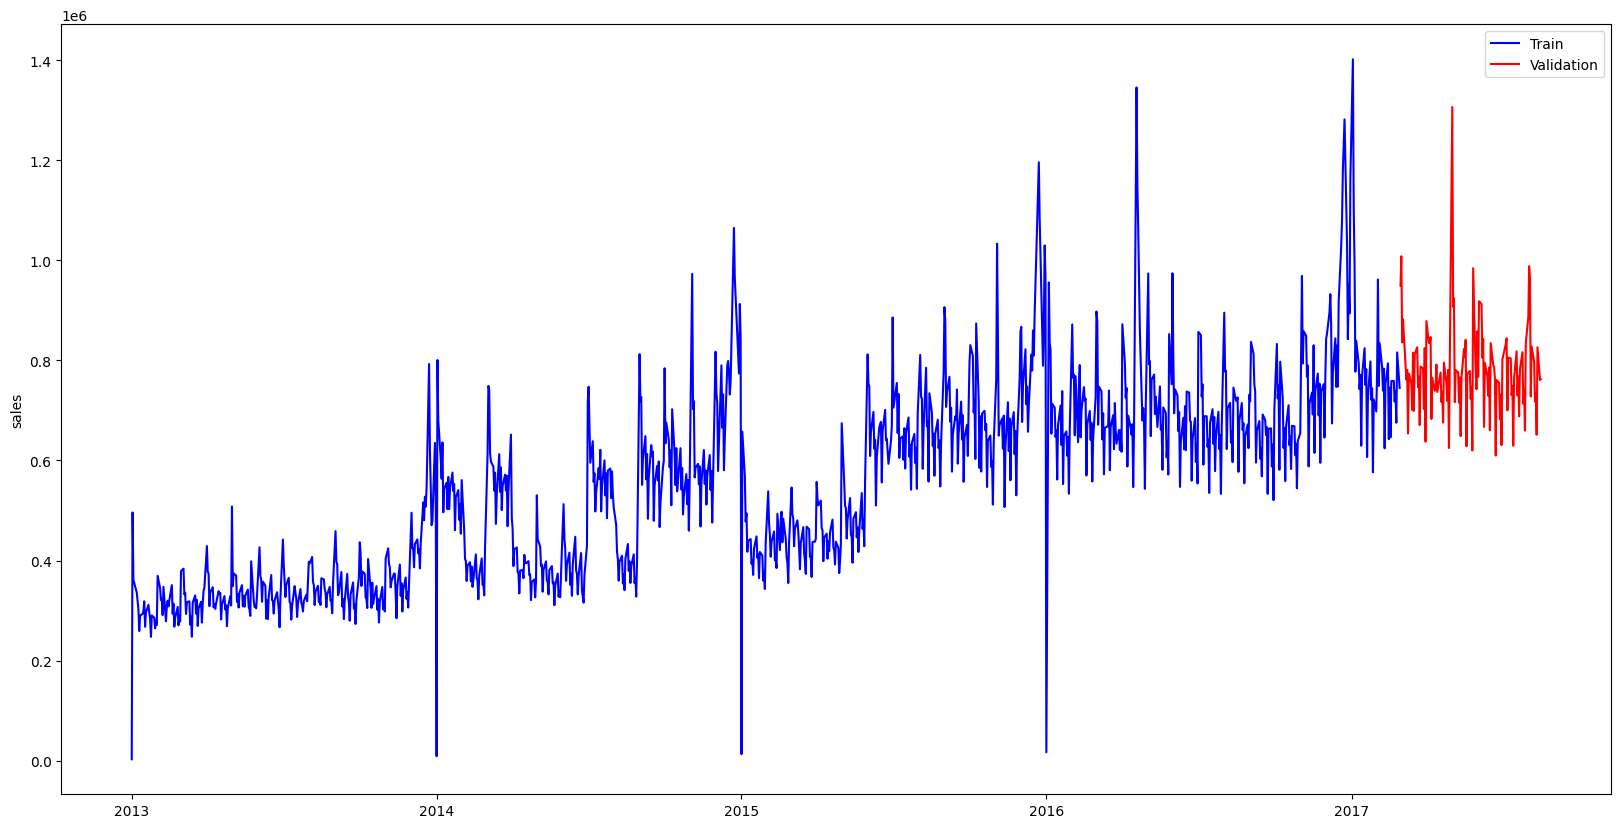

In [19]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=train_x, x=train_x.index, y="sales", color="blue", label="Train")
sns.lineplot(data=val_x, x=val_x.index, y="sales", color="red", label="Validation")
plt.legend()

In [20]:
data_x.describe()

,onpromotion,dcoilwtico,cluster,sales
count,1688.000000,1688.000000,1688.0,1.688000e+03
mean,0.186650,0.493774,0.0,5.811051e+05
std,0.205527,0.304203,0.0,1.963629e+05
min,0.000000,0.000000,0.0,2.511619e+03
25%,0.000000,0.239044,0.0,3.965479e+05
50%,0.114398,0.321015,0.0,5.998083e+05
75%,0.331875,0.824292,0.0,7.266150e+05
max,1.000000,1.000000,0.0,1.402306e+06


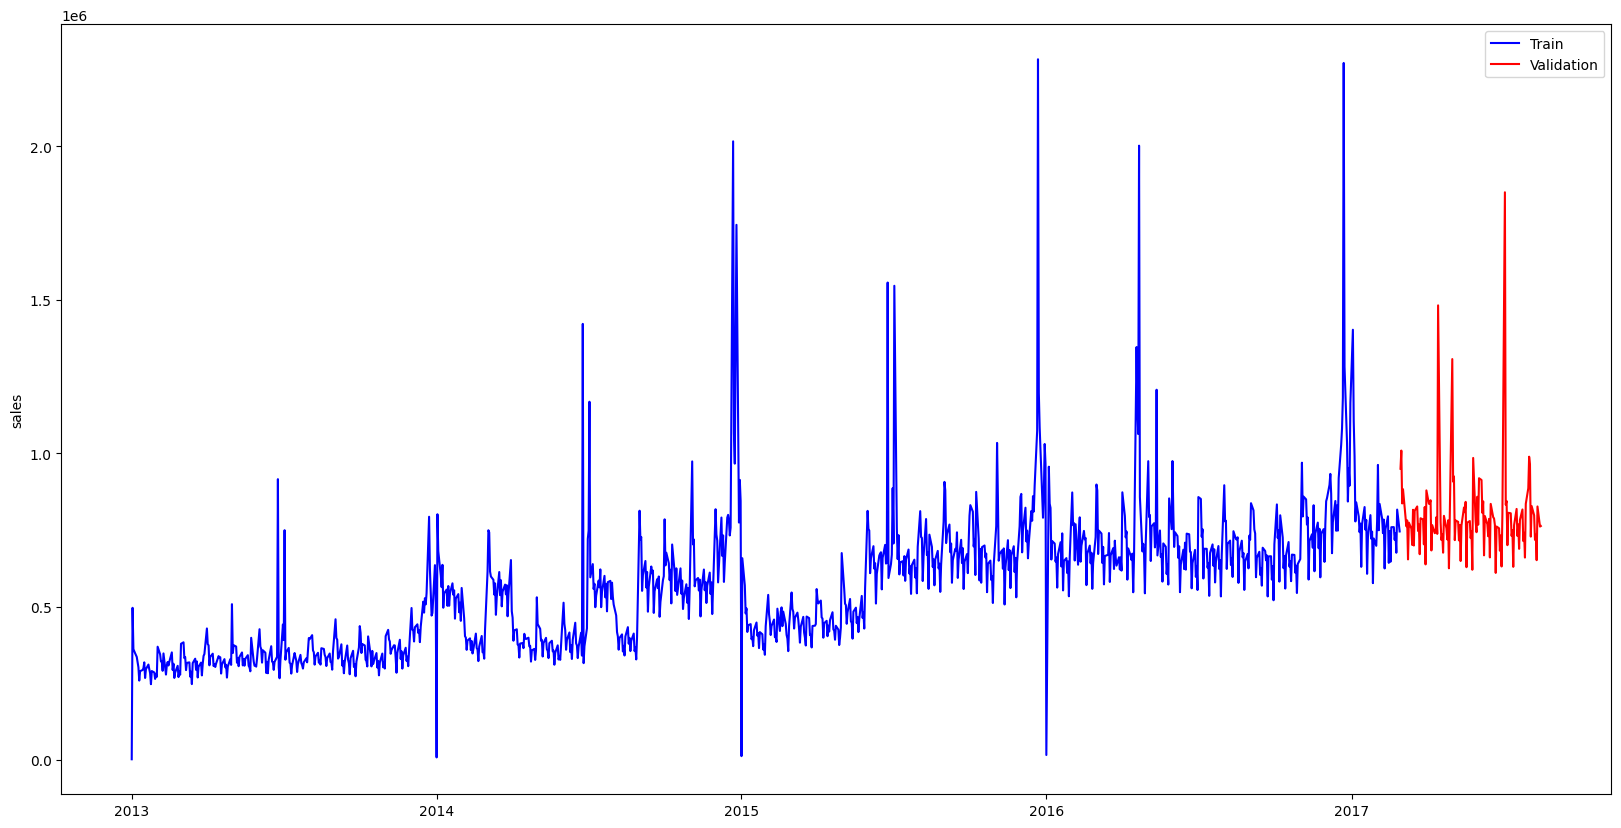

In [21]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=train, x=train.index, y="sales", color="blue", label="Train")
sns.lineplot(data=val, x=val.index, y="sales", color="red", label="Validation")
plt.legend()

In [22]:
data.describe()

,onpromotion,dcoilwtico,cluster,sales
count,1688.000000,1688.000000,1688.0,1.688000e+03
mean,0.160616,0.493756,0.0,5.909539e+05
std,0.178268,0.304237,0.0,2.248781e+05
min,0.000000,0.000000,0.0,2.511619e+03
25%,0.000000,0.239113,0.0,3.975327e+05
50%,0.098106,0.320917,0.0,6.024340e+05
75%,0.282689,0.824292,0.0,7.283546e+05
max,1.000000,1.000000,0.0,2.283724e+06


On a éliminé tous lrs outliers provenant de doublons. Regardons maintenant le reste.

# EDA OUTLIERS PT2

In [23]:
data_x = pd.concat([train_x, val_x])

On regarde d'abord les outliers sous le quantile 0.01.

In [24]:
q_low = data_x["sales"].quantile(0.01)

data_xoutliers_low = data_x[(data_x["sales"] <= q_low)]
data_xoutliers_low

,onpromotion,dcoilwtico,cluster,sales,typedays_Additional,typedays_Event,typedays_Holiday,typedays_Normal
2013-01-01,0.000000,0.792965,0.0,2511.618999,False,False,True,False
2013-01-10,0.000000,0.800900,0.0,258982.003049,False,False,False,True
2013-01-17,0.000000,0.820798,0.0,267498.515975,False,False,False,True
2013-01-24,0.000000,0.819140,0.0,247245.690995,False,False,False,True
2013-01-29,0.000000,0.846026,0.0,264488.818076,False,False,False,True
2013-01-31,0.000000,0.846382,0.0,271254.217996,False,False,False,True
2013-02-21,0.000000,0.788819,0.0,267711.109015,False,False,False,True
2013-02-26,0.000000,0.786924,0.0,270425.007067,False,False,False,True
2013-03-12,0.000000,0.784674,0.0,271823.378010,False,False,False,True
2013-03-14,0.000000,0.791662,0.0,247541.420096,False,False,False,True


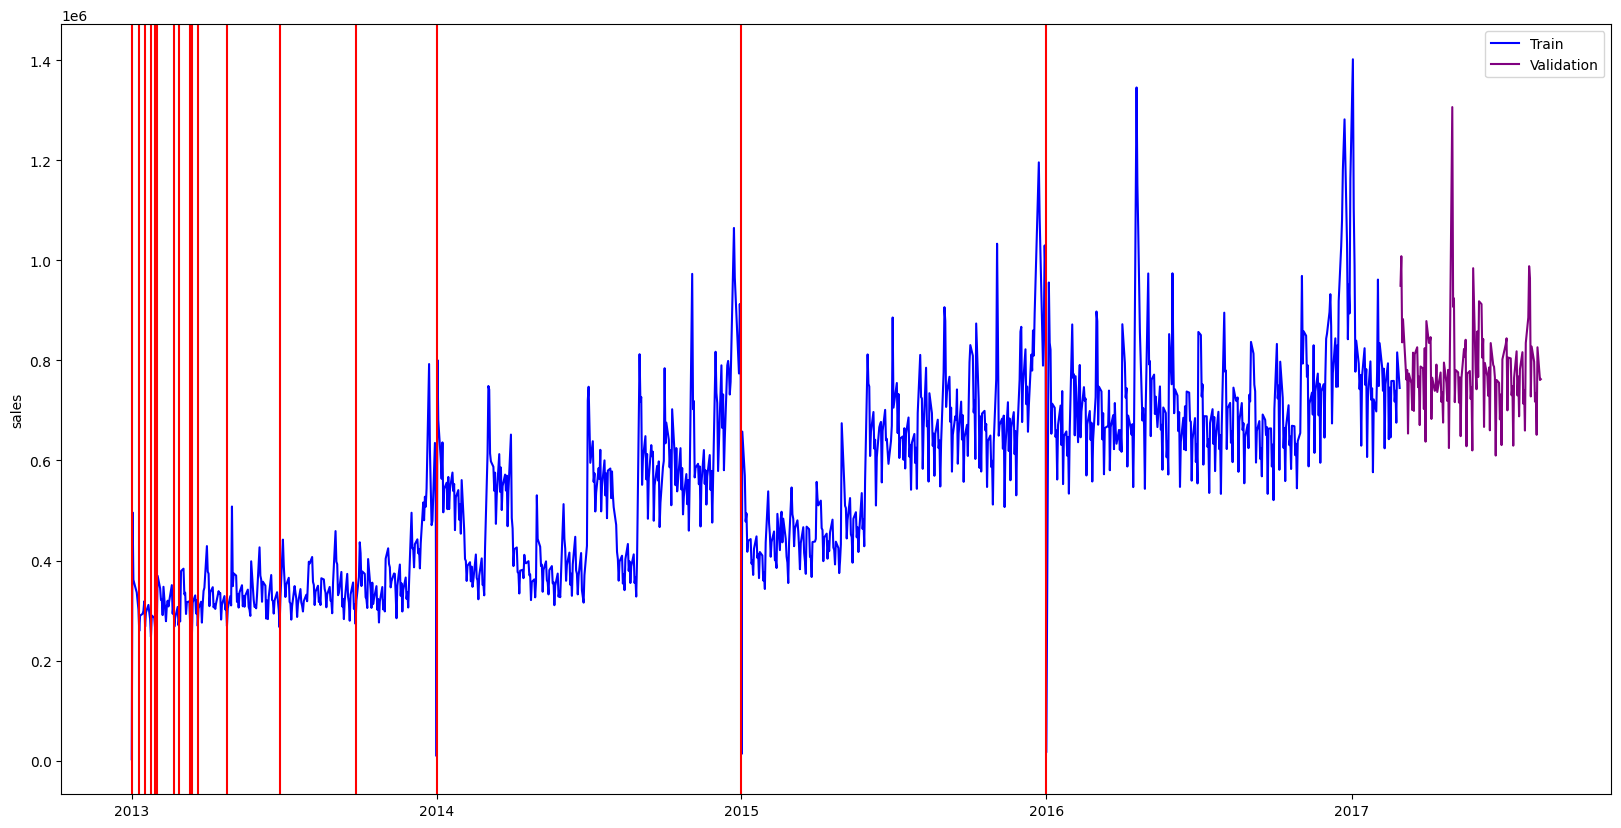

In [25]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=train_x, x=train_x.index, y="sales", color="blue", label="Train")
sns.lineplot(data=val_x, x=val_x.index, y="sales", color="purple", label="Validation")
for i in data_xoutliers_low.index:
    plt.axvline(i, color="red")
plt.legend()

Rien d'étrange à priori : On retrouve les 1ers de l'an + quelques jours en 2013. Ces derniers sont dues à une baseline + basse cette année là donc rien d'alarmant.

Regardons au dessus du quartile 0.99

In [26]:
q_high = data_x["sales"].quantile(0.99)

data_xoutliers_high = data_x[(data_x["sales"] >= q_high)]
data_xoutliers_high

,onpromotion,dcoilwtico,cluster,sales,typedays_Additional,typedays_Event,typedays_Holiday,typedays_Normal
2015-12-22,0.206377,0.112105,0.0,1.134517e+06,False,False,False,True
2015-12-23,0.345333,0.125192,0.0,1.196146e+06,True,False,False,False
2016-04-17,0.214785,0.163094,0.0,1.119816e+06,False,False,False,True
2016-04-18,0.151707,0.160488,0.0,1.345921e+06,False,True,False,False
2016-04-19,0.227467,0.173990,0.0,1.152089e+06,False,True,False,False
2016-12-21,0.872157,0.299064,0.0,1.181307e+06,True,False,False,False
2016-12-22,0.836864,0.302440,0.0,1.231726e+06,False,False,False,True
2016-12-23,0.801571,0.305815,0.0,1.282146e+06,True,False,False,False
2016-12-24,0.718266,0.307414,0.0,1.199021e+06,False,False,False,True
2016-12-25,0.634960,0.309013,0.0,1.115896e+06,False,False,False,True


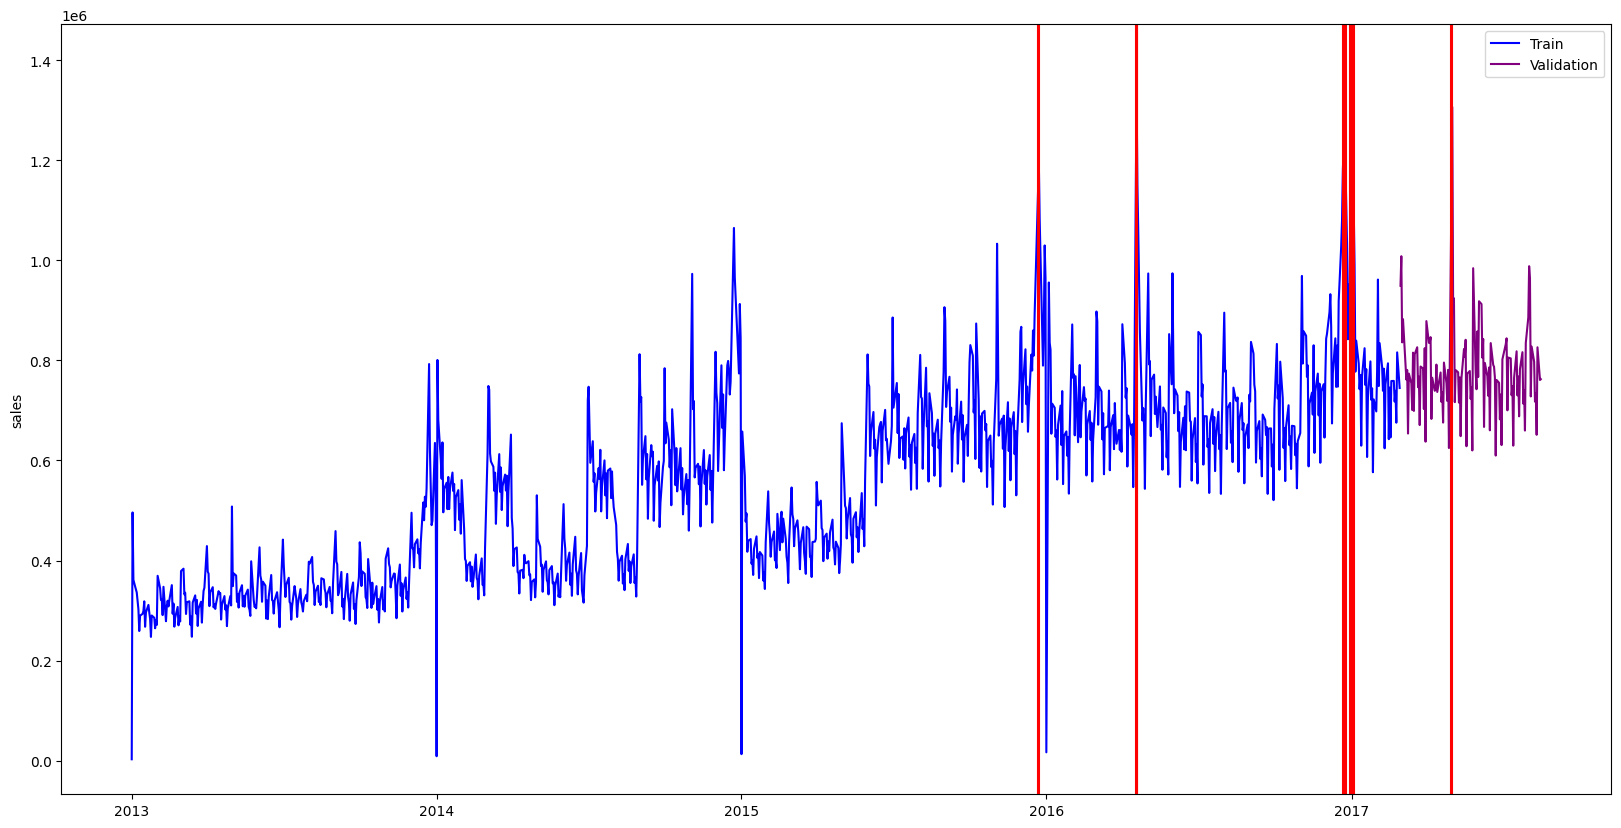

In [27]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=train_x, x=train_x.index, y="sales", color="blue", label="Train")
sns.lineplot(data=val_x, x=val_x.index, y="sales", color="purple", label="Validation")
for i in data_xoutliers_high.index:
    plt.axvline(i, color="red")
plt.legend()

1er janvier 2017 == Normal mais 2 janvier == holidays ? -> to check

In [32]:
h[h["date"].isin(["2017-01-01", "2017-01-02"])]

,date,type,locale,locale_name,description,transferred
297,2017-01-01,Holiday,National,Ecuador,Primer dia del ano,True
298,2017-01-02,Transfer,National,Ecuador,Traslado Primer dia del ano,False


Oui c'est normal

Focus Sur avril 2014 -> 3 outliers en borne haute sur les 17 18 et 19

In [50]:
h[
    h["date"].isin(
        [
            "2016-04-16",
            "2016-04-17",
            "2016-04-18",
            "2016-04-19",
            "2016-04-20",
            "2016-04-21",
            "2016-05-16",
        ]
    )
]

,date,type,locale,locale_name,description,transferred
219,2016-04-16,Event,National,Ecuador,Terremoto Manabi,False
220,2016-04-17,Event,National,Ecuador,Terremoto Manabi+1,False
221,2016-04-18,Event,National,Ecuador,Terremoto Manabi+2,False
222,2016-04-19,Event,National,Ecuador,Terremoto Manabi+3,False
223,2016-04-20,Event,National,Ecuador,Terremoto Manabi+4,False
224,2016-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False
225,2016-04-21,Event,National,Ecuador,Terremoto Manabi+5,False
254,2016-05-16,Event,National,Ecuador,Terremoto Manabi+30,False


Terremoto Manabi = Seisme important en Equateur. Les jours sont notés comme des évenement jusqu'a 1 mois après l'evenement càd jusqu'au 16 mai. Impact important sur les ventes jusqu'a j+3.

In [51]:
h[h["date"].isin(["2017-04-30", "2017-05-01"])]

,date,type,locale,locale_name,description,transferred
308,2017-05-01,Holiday,National,Ecuador,Dia del Trabajo,False


In [56]:
x[x["date"].isin(["2017-04-28", "2017-04-30"])]

,date,store_nbr,family,sales,onpromotion,dcoilwtico,typedays,locale,locale_name,description,transferred,city,state,typestores,cluster
2035044,2017-04-28,1,AUTOMOTIVE,3.000,0,49.31,Normal,NaN,NaN,NaN,False,Quito,Pichincha,D,13
2035045,2017-04-28,1,BABY CARE,0.000,0,49.31,Normal,NaN,NaN,NaN,False,Quito,Pichincha,D,13
2035046,2017-04-28,1,BEAUTY,2.000,0,49.31,Normal,NaN,NaN,NaN,False,Quito,Pichincha,D,13
2035047,2017-04-28,1,BEVERAGES,2235.000,28,49.31,Normal,NaN,NaN,NaN,False,Quito,Pichincha,D,13
2035048,2017-04-28,1,BOOKS,0.000,0,49.31,Normal,NaN,NaN,NaN,False,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036821,2017-04-28,9,POULTRY,396.986,20,49.31,Normal,NaN,NaN,NaN,False,Quito,Pichincha,B,6
2036822,2017-04-28,9,PREPARED FOODS,88.156,0,49.31,Normal,NaN,NaN,NaN,False,Quito,Pichincha,B,6
2036823,2017-04-28,9,PRODUCE,1071.420,8,49.31,Normal,NaN,NaN,NaN,False,Quito,Pichincha,B,6
2036824,2017-04-28,9,SCHOOL AND OFFICE SUPPLIES,3.000,0,49.31,Normal,NaN,NaN,NaN,False,Quito,Pichincha,B,6


# Check Events

In [58]:
h[h["type"] == "Event"]

,date,type,locale,locale_name,description,transferred
55,2013-05-12,Event,National,Ecuador,Dia de la Madre,False
103,2014-05-11,Event,National,Ecuador,Dia de la Madre,False
106,2014-06-12,Event,National,Ecuador,Inauguracion Mundial de futbol Brasil,False
107,2014-06-15,Event,National,Ecuador,Mundial de futbol Brasil: Ecuador-Suiza,False
108,2014-06-20,Event,National,Ecuador,Mundial de futbol Brasil: Ecuador-Honduras,False
113,2014-06-25,Event,National,Ecuador,Mundial de futbol Brasil: Ecuador-Francia,False
114,2014-06-28,Event,National,Ecuador,Mundial de futbol Brasil: Octavos de Final,False
115,2014-06-29,Event,National,Ecuador,Mundial de futbol Brasil: Octavos de Final,False
116,2014-06-30,Event,National,Ecuador,Mundial de futbol Brasil: Octavos de Final,False
117,2014-07-01,Event,National,Ecuador,Mundial de futbol Brasil: Octavos de Final,False
